# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing Libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set (color_codes= True)
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') 

### Data Overview

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [3]:
df.shape

(1898, 9)

#### Observations:  
* There are 1898 rows and 9 columns in the foodhub dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There three different data types in the dataset: int64, object, float64. 
* The columns 'order_id', 'customer_id', 'food_preparation_time', and 'delivery_time' have integer data type.
* The column 'cost_of_the_order' is the only one that have float data type (wich make sense because the used values are money).
* The columns 'restaurant_name', 'cusine_type', 'day_of_the_week', and 'raiting' have object data type.

#### Data Types Conversion

In [5]:
df.restaurant_name=df.restaurant_name.astype ('category')
df.cuisine_type=df.cuisine_type.astype ('category')
df.day_of_the_week=df.day_of_the_week.astype ('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
* Converting object into categorical data type is important because it reduces the storing space, and gives a specific data type to the variable which is good practice before going forward with ploting and calculations.
* The column'rating' still has a object data type. We need to perform further analysis on these variable, since it is a numerical variable but the missing values have been marked as 'Not given'


In [6]:
df.describe(include='all') 
#the code also includes the non-numerical values in the summary 
#considering that 4 out of 9 variables are non-numerical, including all variables can give us some important preliminar insights

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### Observations:
* 'order_id' and 'customer_id' have no statistical significance for this type of calculation.
* There are 178 different restaurants in the dataset. The restaurant that has processed more orders is 'Shake Shack' with a total of 219 orders.
* There are 14 different types of food, and the most popular is 'American' with a total of 584 orders.
* Most of the orders are placed on weekends. 1351 out of the 1898 orders are placed on Weekends.
* Although we kenow the variable 'rating' is given by the customer out of 5, there are 4 unique values in the column. And the most frequent value is 'Not given' (736 out of 1898).
* Customers spend an avarage of ~16.50 dollars on each order. The higest order is 34.41 dolalrs, and the lowest 4.47 dollars.
* The orders praparation time is between 20 and 35 minutes, the median preparation time is 27 minutes. And all orders take an avarage of ~27 minutes of preparation too.
* Delivery times varies between 15 and 33 minutes. The same as in the case of preparation time, the median and the avarage delivery time are almost equal, 25 and ~24.16 minutes respectively.


### How many orders are not rated?

In [7]:
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [8]:
df.rating.value_counts(normalize=True, dropna=False)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

#### Observations:
736 out of 1898 orders are not rated. Given the fact that almost 40% of the orders are not rated, it's not possible to disregard those orders and drop them from the dataset. 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

***Univariate analysis: Order Id***

In [9]:
df.order_id.nunique () #I first check the number of unique values to verify if each order receives a different id

1898

**Observations:** Since the 'order_id' is a unique value with the only purpose of identifying the order, it has no analytical relevance apart from knowing the total number of orders in the dataset.

***Univariate analysis: Customer Id***

In [10]:
df.customer_id.nunique () 
#I first check the number of unique values to verify if there are customers who have ordered more than once.

1200

In [11]:
df_frequent_customers =df.customer_id.value_counts() 
#I create a dataframe with the value count for each customer, to know how many orders has placed each customer.
df_frequent_customers = df_frequent_customers.loc [df_frequent_customers >1] 
#I filter the customers with more than one order.
df_frequent_customers.count()

416

In [12]:
df_frequent_customers_total =df.customer_id.value_counts() 
df_frequent_customers_total.value_counts (normalize=True)

1     0.653333
2     0.222500
3     0.069167
4     0.027500
5     0.015833
6     0.005000
7     0.003333
8     0.000833
9     0.000833
10    0.000833
13    0.000833
Name: customer_id, dtype: float64

In [13]:
df_frequent_customers.value_counts(normalize=True)

2     0.641827
3     0.199519
4     0.079327
5     0.045673
6     0.014423
7     0.009615
8     0.002404
9     0.002404
10    0.002404
13    0.002404
Name: customer_id, dtype: float64

**Observations:** 
* There are 1200 different customers in the dataset.
* 416 out of 1200 customers have ordered more than one time.
* The majority of the customers (65%) have used the app only once.
* For those that order more than one time, the most frequent number of orders is 2. Customers with two orders represent 64.18 % (considering only those who order more than once). 

In [14]:
#I create a function to plot a boxplot and an histogram together, I'll use these function for numerical variables.

def num_variables_boxplot_histplot (dataframe, column, figsize=(7,5)):
    plot_grid, (ax1, ax2) = plt.subplots( #Create a grid to lay out the two subplots
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # Share x-axes among all subplots
        figsize=figsize,#Total figure size
        gridspec_kw={"height_ratios": (0.30, 0.70)}) #What proportion of the total fig size each plot takes
       
    
    sns.boxplot(data=dataframe, x=column, ax=ax1, color="pink")  #Boxplot
    ax1.axvline(
        dataframe[column].mean(), color="green", linestyle="--")  # Add mean to the boxplot
    
    sns.histplot(data=dataframe, x=column, ax=ax2, color='orange', kde=True) 
    ax2.axvline(
        dataframe[column].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax2.axvline(
        dataframe[column].median(), color="gray", linestyle="-")  # Add median to the histogram
 

***Univariate analysis: Cost of the order***

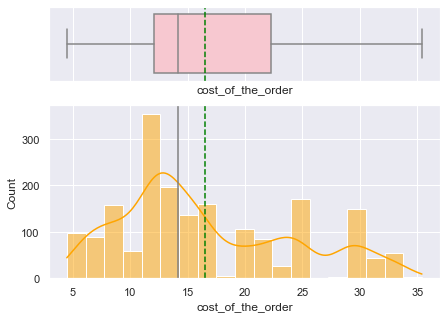

In [15]:
num_variables_boxplot_histplot (df, 'cost_of_the_order')

**Observations:** 
* As we've observed before, the cost of the order varies between ~5 and ~35. 
* Although there are no extreme values (outliers), the distribution is right skewed because the mean is greater than the median.

***Univariate analysis: Food praparation time***

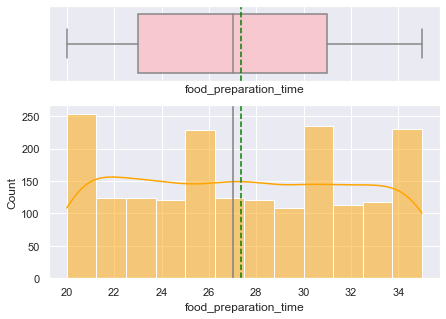

In [16]:
num_variables_boxplot_histplot (df, 'food_preparation_time')

**Observations:** 
* As we've observed before, the food preparation time varies between 20 and ~35. 
* There are no extreme values (outliers).
* If we analyze the median and the mean the distribution is close to normal (both are around 27 minutes), nontheless we can obseve there are kind of four modes: two on the left side of the median and mean, and two on the right side (the only actual mode is 21 minutes )

***Univariate analysis: Delivery time***

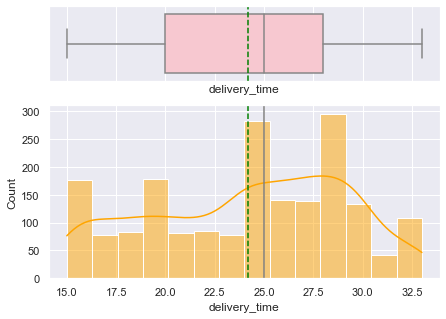

In [17]:
num_variables_boxplot_histplot (df, 'delivery_time')

**Observations:**
* The delivery time varies between 15 and 33 minutes. 
* Although there are no outliers, and the median and mean are close, the distribution is a bit left skewed. The mean is on the left side of the median.
* The most common delivery time is around 29 minutes, but it's also habitual to have a delivery time of 25 minutes.

***Univariate analysis: Restaurant name***

In [18]:
df.restaurant_name.nunique () #Check the total number of restaurants in the dataset

178

In [19]:
df.restaurant_name.value_counts().head() #See the 5 restaurants that have received more orders

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [20]:
#Plot the proportion of orders each restaurant has received in relation to the total number or orders
df_restaurant_name= df.restaurant_name.value_counts().sort_values(ascending = False).reset_index() 
#Organize the restaurant by number of orders
df_restaurant_name.columns= ['restaurant_name', 'count'] #Assign columns' names
top_size= 10 #Create a variable to select the top number of restaurants
df_restaurant_name_top= df_restaurant_name[:top_size] #Create a dataframe with the top restaurants
df_restaurant_name_other= df_restaurant_name[top_size:] #Create a data frame with the non-top restaurants
df_restaurant_name_other_sum= pd.DataFrame(data = {
    'restaurant_name' : ['Others'],
    'count' : [df_restaurant_name_other['count'].sum()]}) #Replace the name of the non-top restaurants with "Others"
df_concat=pd.concat([df_restaurant_name_top, df_restaurant_name_other_sum]) #Concat both dataframes
df_restaurant_name_top.set_index('restaurant_name') #Use 'restaurant_name' as index

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55
TAO,49
Han Dynasty,46


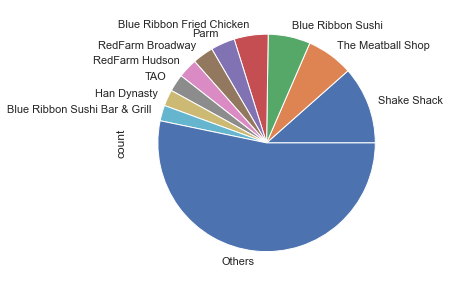

In [21]:
plot2 = df_concat.plot.pie(y='count',labels=df_concat['restaurant_name'], figsize=(15, 5), legend=None)


**Observations:** 
* The three restaurants with more orders are: Shake Shack, The Meatball Shop, and Blue Ribbon Sushi.
* There are 10 out of 178 restaurants that accumulate almost half of the total orders. 
* The top-3 restaurants represents about 1/4 of the total orders, and the other top-7 restaurants account for the other 1/4. 

***Univariate analysis: Cuisine type***

<AxesSubplot:xlabel='count', ylabel='cuisine_type'>

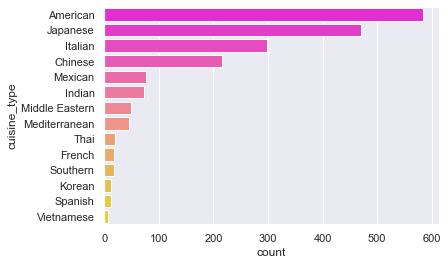

In [22]:
sns.countplot (data=df, y=df.cuisine_type, order=df.cuisine_type.value_counts().iloc[:].index, palette='spring') 
#Use the function .values_count() to organize the bars in counting descending order

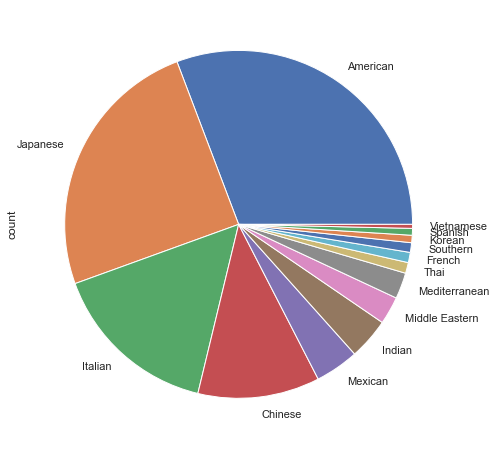

In [23]:
df_cuisine_type= df.cuisine_type.value_counts().sort_values(ascending = False).reset_index() 
df_cuisine_type.columns= ['cuisine_type', 'count'] 
df_cuisine_type.set_index('cuisine_type')
plot3 = df_cuisine_type.plot.pie(y='count',labels=df_cuisine_type['cuisine_type'], figsize=(15, 8), legend=None)

**Observations:** American, Japanese, Italian and Chinese are the most popular type of food, representing about 3/4 of the total orders of the dataset.

***Univariate analysis: Day of the week***

<AxesSubplot:xlabel='day_of_the_week', ylabel='count'>

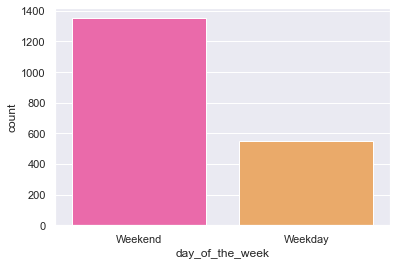

In [24]:
sns.countplot (data=df, x=df.day_of_the_week, order=df.day_of_the_week.value_counts().iloc[:].index, palette='spring')

**Observations:** 
* Most of the orders are placed during weekends (clouse to 1400 orders).
* The orders on weekends more than doble the orders on weekdays.

***Univariate analysis: Raiting***

<AxesSubplot:xlabel='rating', ylabel='count'>

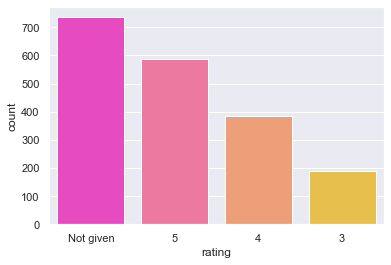

In [25]:
sns.countplot (data=df, x=df.rating, order=df.rating.value_counts().iloc[:].index, palette='spring')

**Observations:** 
* The rating varies between 3 and 5, there are no ratings lower than 3.
* About 700 out of 1989 orders have not received a rating.
* Most of the orders that have been rated got 5 stars.

### What are the top 5 restaurants that have received the highest number of orders?

In [26]:
df.restaurant_name.value_counts().head() #Count values and select the top-5 using .head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
* The top 5 restaurants with more orders are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chiquen, and Parm.
* The restaurant with more orders in the dataset, Shake Shack, have received almost 100 more orders than the second most favorite restaurant.

### What is the most popular cuisine on weekends?

In [27]:
weekend_orders=df.loc[df.day_of_the_week == 'Weekend'] #Use .loc to filter 'day_of_the_week' by 'Weekend'
weekend_orders.cuisine_type.value_counts().head(1) #Count values and select the top-1 using .head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:
* The most popular cuisine on weekends is American.


### What is the number of total orders where the cost is above 20 dollars? What is the percentage of such orders in the dataset?

In [28]:
orders_above20= df.loc[df.cost_of_the_order >20] #Use .loc plus a conditional to filter orders above 20 dollars
orders_above20=orders_above20.shape[0] #Use .shape[0] to see the total number of rows and no number of columns
print ('The total number of orders above 20 dollars is', orders_above20)

The total number of orders above 20 dollars is 555


In [29]:
above20_percentage=(orders_above20*100)/df.shape[0] #calculate the percentage
above20_percentage
print ('The percentage of orders obove 20 dollars is', round (above20_percentage,2),'%') 
#print and round the result using round(_,2) to set 2 as the number of decimal points

The percentage of orders obove 20 dollars is 29.24 %


#### Observations:
* The number of orders above 20 dollars is 555, they represent 29.24% of the total orders (almost 1/3).

### What is the mean delivery time?

In [30]:
mean_delivery_time=df.loc[:,'delivery_time'].mean() #Use .loc to select the required column and the function .mean()
print ('The mean delivery time is ~', round (mean_delivery_time), 'minutes')

The mean delivery time is ~ 24 minutes


#### Observations:
* After the food is ready, it takes an avarage of 24 minutes to deliver the food to the customers.

### Which is the customer who has spent the maximum amount on a single order?

In [31]:
max_order= df.cost_of_the_order.max()
max_order

35.41

In [32]:
df.loc [df.cost_of_the_order== max_order, :]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations:
* This customer has spent 35.41 dollars in his/her order. This customer ordered his/her food from a restaurant that is not in the top-10 of restaurants with more orders, and sells a low popular type of food (mediterranean).

### Bivariate Analysis

In [33]:
df_copy = df.copy() #I made a copy to avoid modifying the original dataset 

In [34]:
df_copy = df_copy.loc [df_copy.rating != 'Not given'] 
#I use the .loc function to filter the entries with 'Not given' value in the 'rating' column

In [35]:
df_copy.rating = df_copy.rating.astype ('int') 
#Now that all the values are numerical, I cast the 'object' data type into 'int'. 
#Now I can plot 'rating' as a numerical variable if needed.

In [36]:
df_copy.head ()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


**Bivariate analysis: Cost of the order, Food preparation time, Delivery time, and Rating**

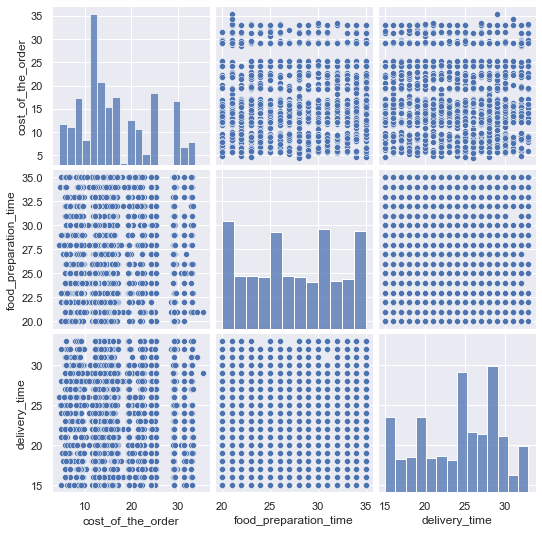

In [37]:
sns.pairplot (df [['cost_of_the_order', 'food_preparation_time', 'delivery_time']])

**Observations:** 
* There is no correlation between the numerical variables of the set.

***Rating vs Delivery time***

<AxesSubplot:xlabel='rating', ylabel='delivery_time'>

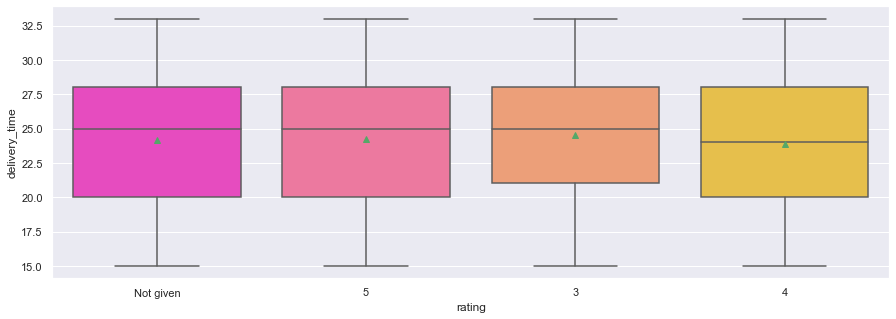

In [38]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'rating', y = 'delivery_time', data = df, showmeans=True, palette='spring')


**Observations:** Both the median and the mean delivery time are almost the same along the different raitings. Therefore, the delivery time doesn't seem to be an important variable to analize the raiting.

***Rating vs Food preparation time***

<AxesSubplot:xlabel='rating', ylabel='food_preparation_time'>

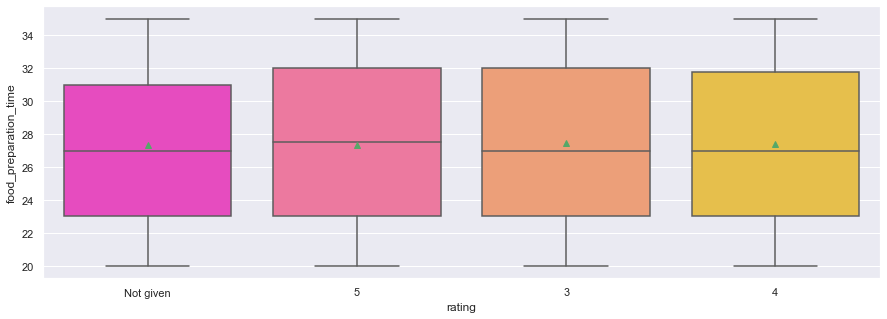

In [39]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'rating', y = 'food_preparation_time', data = df, showmeans=True, palette='spring')

**Observations:** Both the median and the mean food preparation time are almost the same along the different raitings. Therefore, the food preparation time doesn't seem to be an important variable to analize the raiting. This is aligned with the previous observation, from customers perspective the waiting is always the sume of both food praparation and delivery time. Therefore it make sense that both present a similar correlation with raiting.

***Rating vs Cost of the order***

<AxesSubplot:xlabel='rating', ylabel='cost_of_the_order'>

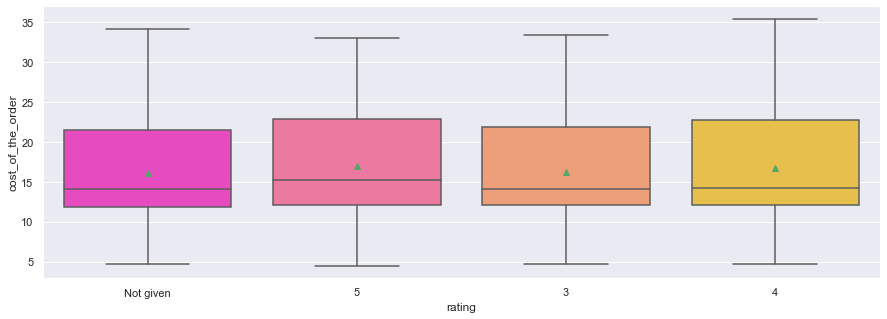

In [40]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'rating', y = 'cost_of_the_order', data = df, showmeans=True, palette='spring')

***Observations:*** In this case, the avarage cost of the order is a bit higher than the median. And this is true for the different raitings. Both median and mean cost of the order are similar across ratings, showing again that the cost of the order doesn't seem to be an important variable to analize the raiting.

***Raiting vs Cuisine type***

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

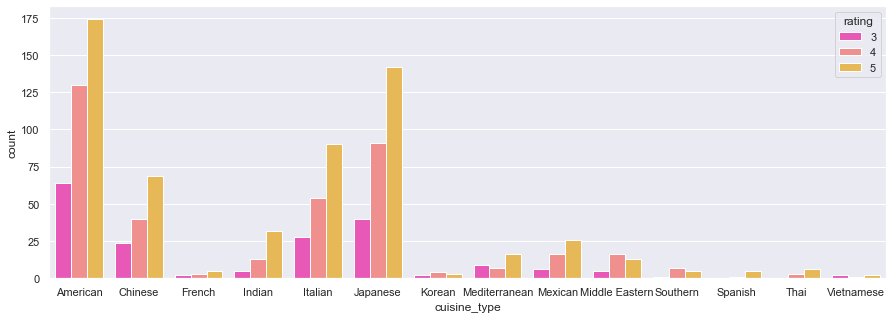

In [41]:
plt.figure(figsize=(15, 5))
sns.countplot(hue = 'rating', x = 'cuisine_type', data = df_copy, palette='spring')

***Observations:*** 
* Rating is also similarly distributed across different cuisine types. 
* The most popular cuisine typs don't have an overproportion of high rating.
* The rating distribuition seem similar between the most popular restaurants, and it is less clear between cuisine types with few orders.

***Rating vs Day of the week***

<AxesSubplot:xlabel='day_of_the_week', ylabel='count'>

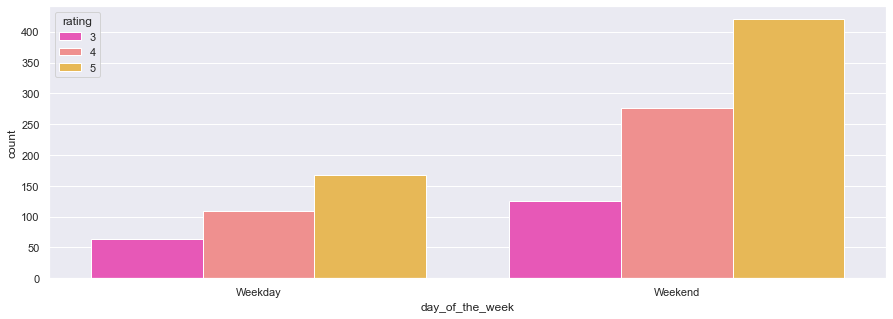

In [42]:
plt.figure(figsize=(15, 5))
sns.countplot(hue = 'rating', x = 'day_of_the_week', data = df_copy, palette='spring')

***Observations:*** Rating is also similarly distributed during weekends and weekdays, although there are more orders during weekends.

***Cuisine type vs Food preparation time***

<AxesSubplot:xlabel='cuisine_type', ylabel='food_preparation_time'>

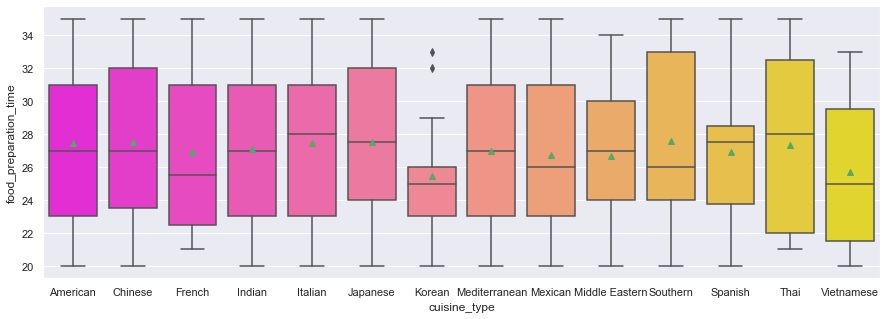

In [43]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'cuisine_type', y = 'food_preparation_time', data = df, showmeans=True, palette='spring')

**Observations:** 
* Food preparation time varies across cuisine types. 
* The four most popular food types: American, Japanese, Italian, and Chinese, have a similar median and mean food preparation time.
* The American cuisine type, wich is the one that receives more orders and more 5 stars ratings, has an avarage food prep time of 27 minutes (and most of the orders are prepared in that same time). On the other hand, Korean and Viernamese food have the lowest avarage prep time (Korean with some outliers), nonetheless they have a low demand. 

***Cuisine type vs Cost of the order***

<AxesSubplot:xlabel='cuisine_type', ylabel='cost_of_the_order'>

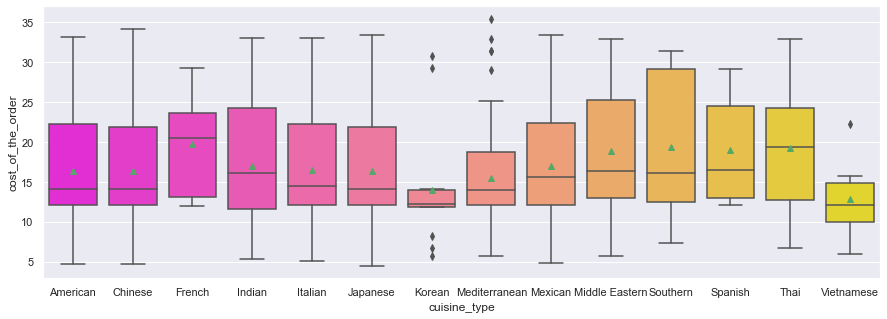

In [44]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'cuisine_type', y = 'cost_of_the_order', data = df, showmeans=True, palette='spring')

**Observations:** 
* The cost of the order varies across cuisine types. 
* French food has the highest avarage cost, and Viernamese the lowest; and one of the outlier orders in the Mediterranean food is the most expensive order of the dataset.
* Again, the four most popular food types (American, Japanese, Italian, and Chinese) have a similar median and mean cost of the order.

***Day of the week vs Delivery time***

<AxesSubplot:xlabel='day_of_the_week', ylabel='delivery_time'>

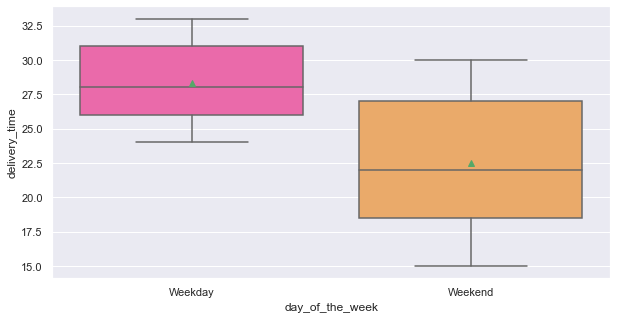

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = df, showmeans=True, palette='spring')

**Observations:** The delivery time is lower during weekends. This will be analyzed more in detail later.

***Cost of the order vs Day of the week***

<AxesSubplot:xlabel='day_of_the_week', ylabel='cost_of_the_order'>

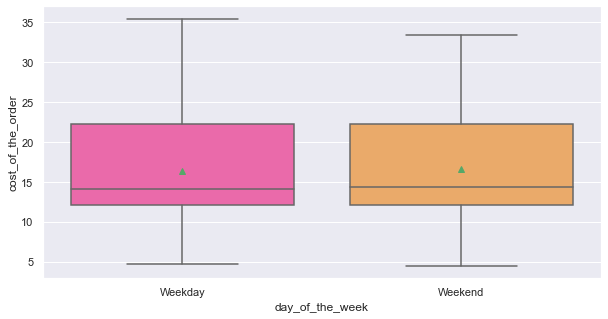

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'day_of_the_week', y = 'cost_of_the_order', data = df, showmeans=True, palette='spring')

**Observations:** Customers spend more or less the same amount of money in their orders during weekdays and weekends.

***Restaurants' revenues***

In [47]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head()

restaurant_name
Shake Shack                  3579.53
The Meatball Shop            2145.21
Blue Ribbon Sushi            1903.95
Blue Ribbon Fried Chicken    1662.29
Parm                         1112.76
Name: cost_of_the_order, dtype: float64

**Observations:** The 5 restaurants that have the highest revenues are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm

### What are the top restaurants with a rating count of more than 50 and the average rating greater than 4?

In [48]:
df_rating = df_copy.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
#I group the entries by 'restaruant_name' and then count the number of rating values they have.
df_rating.head(10) #check if the grouping and counting process went well

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Han Dynasty,23


In [49]:
df_rating_above50= df_rating.loc [df_rating.rating>50] ['restaurant_name'] 
#I filter the restaurants by the total number of ratings, and keep only those restaurants that have a rating count above 50
df_rating_above50

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: category
Categories (178, object): [''wichcraft', '12 Chairs', '5 Napkin Burger', '67 Burger', ..., 'brgr', 'da Umberto', 'ilili Restaurant', 'indikitch']

In [50]:
df_rating_mean= df_copy[df_copy['restaurant_name'].isin(df_rating_above50)].copy()
#create a new dataframe that includes all the entries for those restaurants that have a rating above 50
df_rating_mean.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.2,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.3,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.2,Weekend,5,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.2,Weekend,4,35,26
22,1478287,150599,Shake Shack,American,29.1,Weekday,5,21,30


In [51]:
df_rating_mean4=df_rating_mean.groupby ('restaurant_name') #I group the restaurants in the new dataframe by name
df_rating_mean4=df_rating_mean4.rating.mean().sort_values (ascending=False).reset_index().dropna() 
#I calculate the mean rating for each restaurant 
df_rating_mean4.head()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [52]:
df_rating_mean4.loc [df_rating_mean4.rating >4, :]
#I filter the restaurants with a mean rating above 4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
* There are four restaurants that fullfil the criteria are: The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.
* These restaurants are the only restaurants that have a rating count of more than 50; and they also have an average rating greater than 4.

### Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. What is the net revenew generated on all orders?

In [53]:
df_revenue = df.copy()
df_revenue['revenue'] = 0

In [54]:
df_revenue['revenue'] = [cost * 0.25 if cost > 20 else 
                         cost * 0.15 if cost > 5 else
                         0
                        for cost in df_revenue['cost_of_the_order']]  

df_revenue.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.3050
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,0.9105
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.8955
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,2.4660
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26,1.0770


In [55]:
print ('The net revenue generated on all orders in the dataset is', round (df_revenue.revenue.sum()), 'dollars')

The net revenue generated on all orders in the dataset is 6166 dollars


#### Observations:
* The net revenue generated on all orders in the dataset is 6166 dollars.

### What is the percentage of orders that have more than 60 minutes of total delivery time?

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [56]:
df_time =df.copy()
df_time ['total_delivery_time'] = df.delivery_time + df.food_preparation_time
df_time.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [57]:
df_time_60= df_time.loc [df_time.total_delivery_time >60].shape[0]
df_time_60

200

In [58]:
print ('The orders that have more than 60 minutes of tatal delivery time are', 
       round((df_time_60 *100)/ df_time.shape [0],2), '%.')

The orders that have more than 60 minutes of tatal delivery time are 10.54 %.


#### Observations:
* 10.54% of the orders take more than 60 minutes to be delivered.

### What is the mean delivery time on weekdays and weekends?

In [59]:
df_delivery = df.groupby ('day_of_the_week') ['delivery_time']
df_delivery_result=df_delivery.mean()
df_delivery_result

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [60]:
print ('The avarage delivery time is ~', round (df_delivery_result.iloc[0], 2), 'minutes on weekdays, and ~',
       round (df_delivery_result.iloc[1], 2), 'minutes on weekends') 

The avarage delivery time is ~ 28.34 minutes on weekdays, and ~ 22.47 minutes on weekends


In [61]:
difference= round (df_delivery_result.iloc[0] -df_delivery_result.iloc[1], 2)
print ('Deliveries on weekends are in avarage ~', difference, 'minutes faster than on weekdays')

Deliveries on weekends are in avarage ~ 5.87 minutes faster than on weekdays


In [62]:
proportion = round ((difference*100) / df_delivery_result.iloc[1], 2)
print ('Deliveries on weekends are in avarage ~', proportion, '% faster than on weekdays')

Deliveries on weekends are in avarage ~ 26.12 % faster than on weekdays


#### Observations: 
* The avarage delivery time is ~22 minutes on weekends, and ~28 minutes on weekdays.
* The avarage delivery time on weekends is lower than the avarage delivery time on weekdays.
* Considering the significant difference between the two delivery times (almost 6 minutes, 26%, faster on weekends), it is pertinent to explore more this difference. 

In [63]:
df_orders = df.groupby ('day_of_the_week') ['order_id']
df_orders.count ()

day_of_the_week
Weekday     547
Weekend    1351
Name: order_id, dtype: int64

In [64]:
df_preparation = df.groupby ('day_of_the_week') ['food_preparation_time']
df_preparation.mean()

day_of_the_week
Weekday    27.212066
Weekend    27.436714
Name: food_preparation_time, dtype: float64

In [65]:
df_total_delivery = df_time.groupby ('day_of_the_week') ['total_delivery_time']
df_total_delivery.mean()

day_of_the_week
Weekday    55.552102
Weekend    49.906736
Name: total_delivery_time, dtype: float64

#### Observations:
* Although the preparation time is almost equal on weekends and weekdays, the total delivery time is higer on weekdays due to the higher delivery time. 
* The restaurants receive more orders on weekends, however this dosen't affect the preparation time that remains the same both on weekdays and weekends.
* Since a biger number of orders doesn't seem to has an impact on the food preparation time, the higher delivery time on weekdays should be related to other factors, such as trafic conditions or drivers availability. There is no information about these variables in the dataset therefore it's not possible to arraive to a precise conclusion on this issue.

### Conclusion and Recommendations

#### Key Insights:

* American, Japanese, Italian, and Chinese restaurants are the most mature market. They also have a similar perfomance across their variables. A loyalty program for those restaurants could be develop to consolidate the market.
* Mexican, Indian, Mediterrenean and Middle Eastern restaurants show the most potential to grow. Special offers and promotions can target this segment. 
* The vast majority of the orders are placed on weekends. Special offers and promotions during weekdays can be implemented to increase the number of orders.
* Customers' retention could be improved. There is a 65% of customers that have used GrubHub only once. A promotion code for second orders may be beneficial. 

####  Further Analysis:
* Altough delivery time doesn't seem to have a direct impact on ratings, it is true that during weekdays there are less orders and the deliery time is higher. 
* Since the higher delivery time on weekdays is not related to the number of orders, it should be related to other factors, such as trafic conditions or drivers availability. 
* If one of the objectives is to increase the number of orders during weekedays, it will be necesary to further analyze these variables.